In [53]:
import pandas as pd
import numpy as np
import re
df = pd.read_csv("F:\CodingEnvironment\DPDPTW2F\draw\hv_pivot_last.csv")

def extract_type_and_node(filename):
    # Use regex to extract type (LC, LR, LRC) and node
    type_match = re.match(r'^(LRC|LR|LC)', filename)
    node_match = re.search(r'_(\d+)_', filename)
    
    base_type = type_match.group(1) if type_match else None
    node = node_match.group(1) if node_match else None
    
    return base_type, node

# Apply the extraction function to create 'base_type' and 'node' columns

df[['base_type', 'node']] = df['file'].apply(lambda x: pd.Series(extract_type_and_node(x)))

print(df)


                file    MOEA/D   MOEA/D+   NSGA-II  PFG-MOEA  PFG-2F-RK  \
0    LC1_2_10_0.json  0.074650  0.071764  0.083412  0.230242   0.452793   
1     LC1_2_1_0.json  0.068078  0.051641  0.102562  0.152212   0.404344   
2     LC1_2_2_0.json  0.061085  0.077565  0.116086  0.169319   0.456885   
3     LC1_2_3_0.json  0.079584  0.099896  0.147143  0.239098   0.500509   
4     LC1_2_4_0.json  0.054056  0.059384  0.113614  0.202131   0.441798   
..               ...       ...       ...       ...       ...        ...   
175  LRC2_8_5_0.json  0.020422  0.023720  0.045777  0.092022   0.196315   
176  LRC2_8_6_0.json  0.011652  0.015497  0.037819  0.082907   0.152543   
177  LRC2_8_7_0.json  0.023550  0.022798  0.056311  0.093274   0.252623   
178  LRC2_8_8_0.json  0.018545  0.014228  0.037131  0.073475   0.217735   
179  LRC2_8_9_0.json  0.026736  0.017547  0.036770  0.079923   0.270692   

     PFG-2F-PM base_type node  
0     0.429883        LC    2  
1     0.366098        LC    2  
2  

C:\Users\Admin\AppData\Local\Temp\ipykernel_12976\1278970595.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12976\1278970595.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12976\1278970595.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12976\1278970595.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

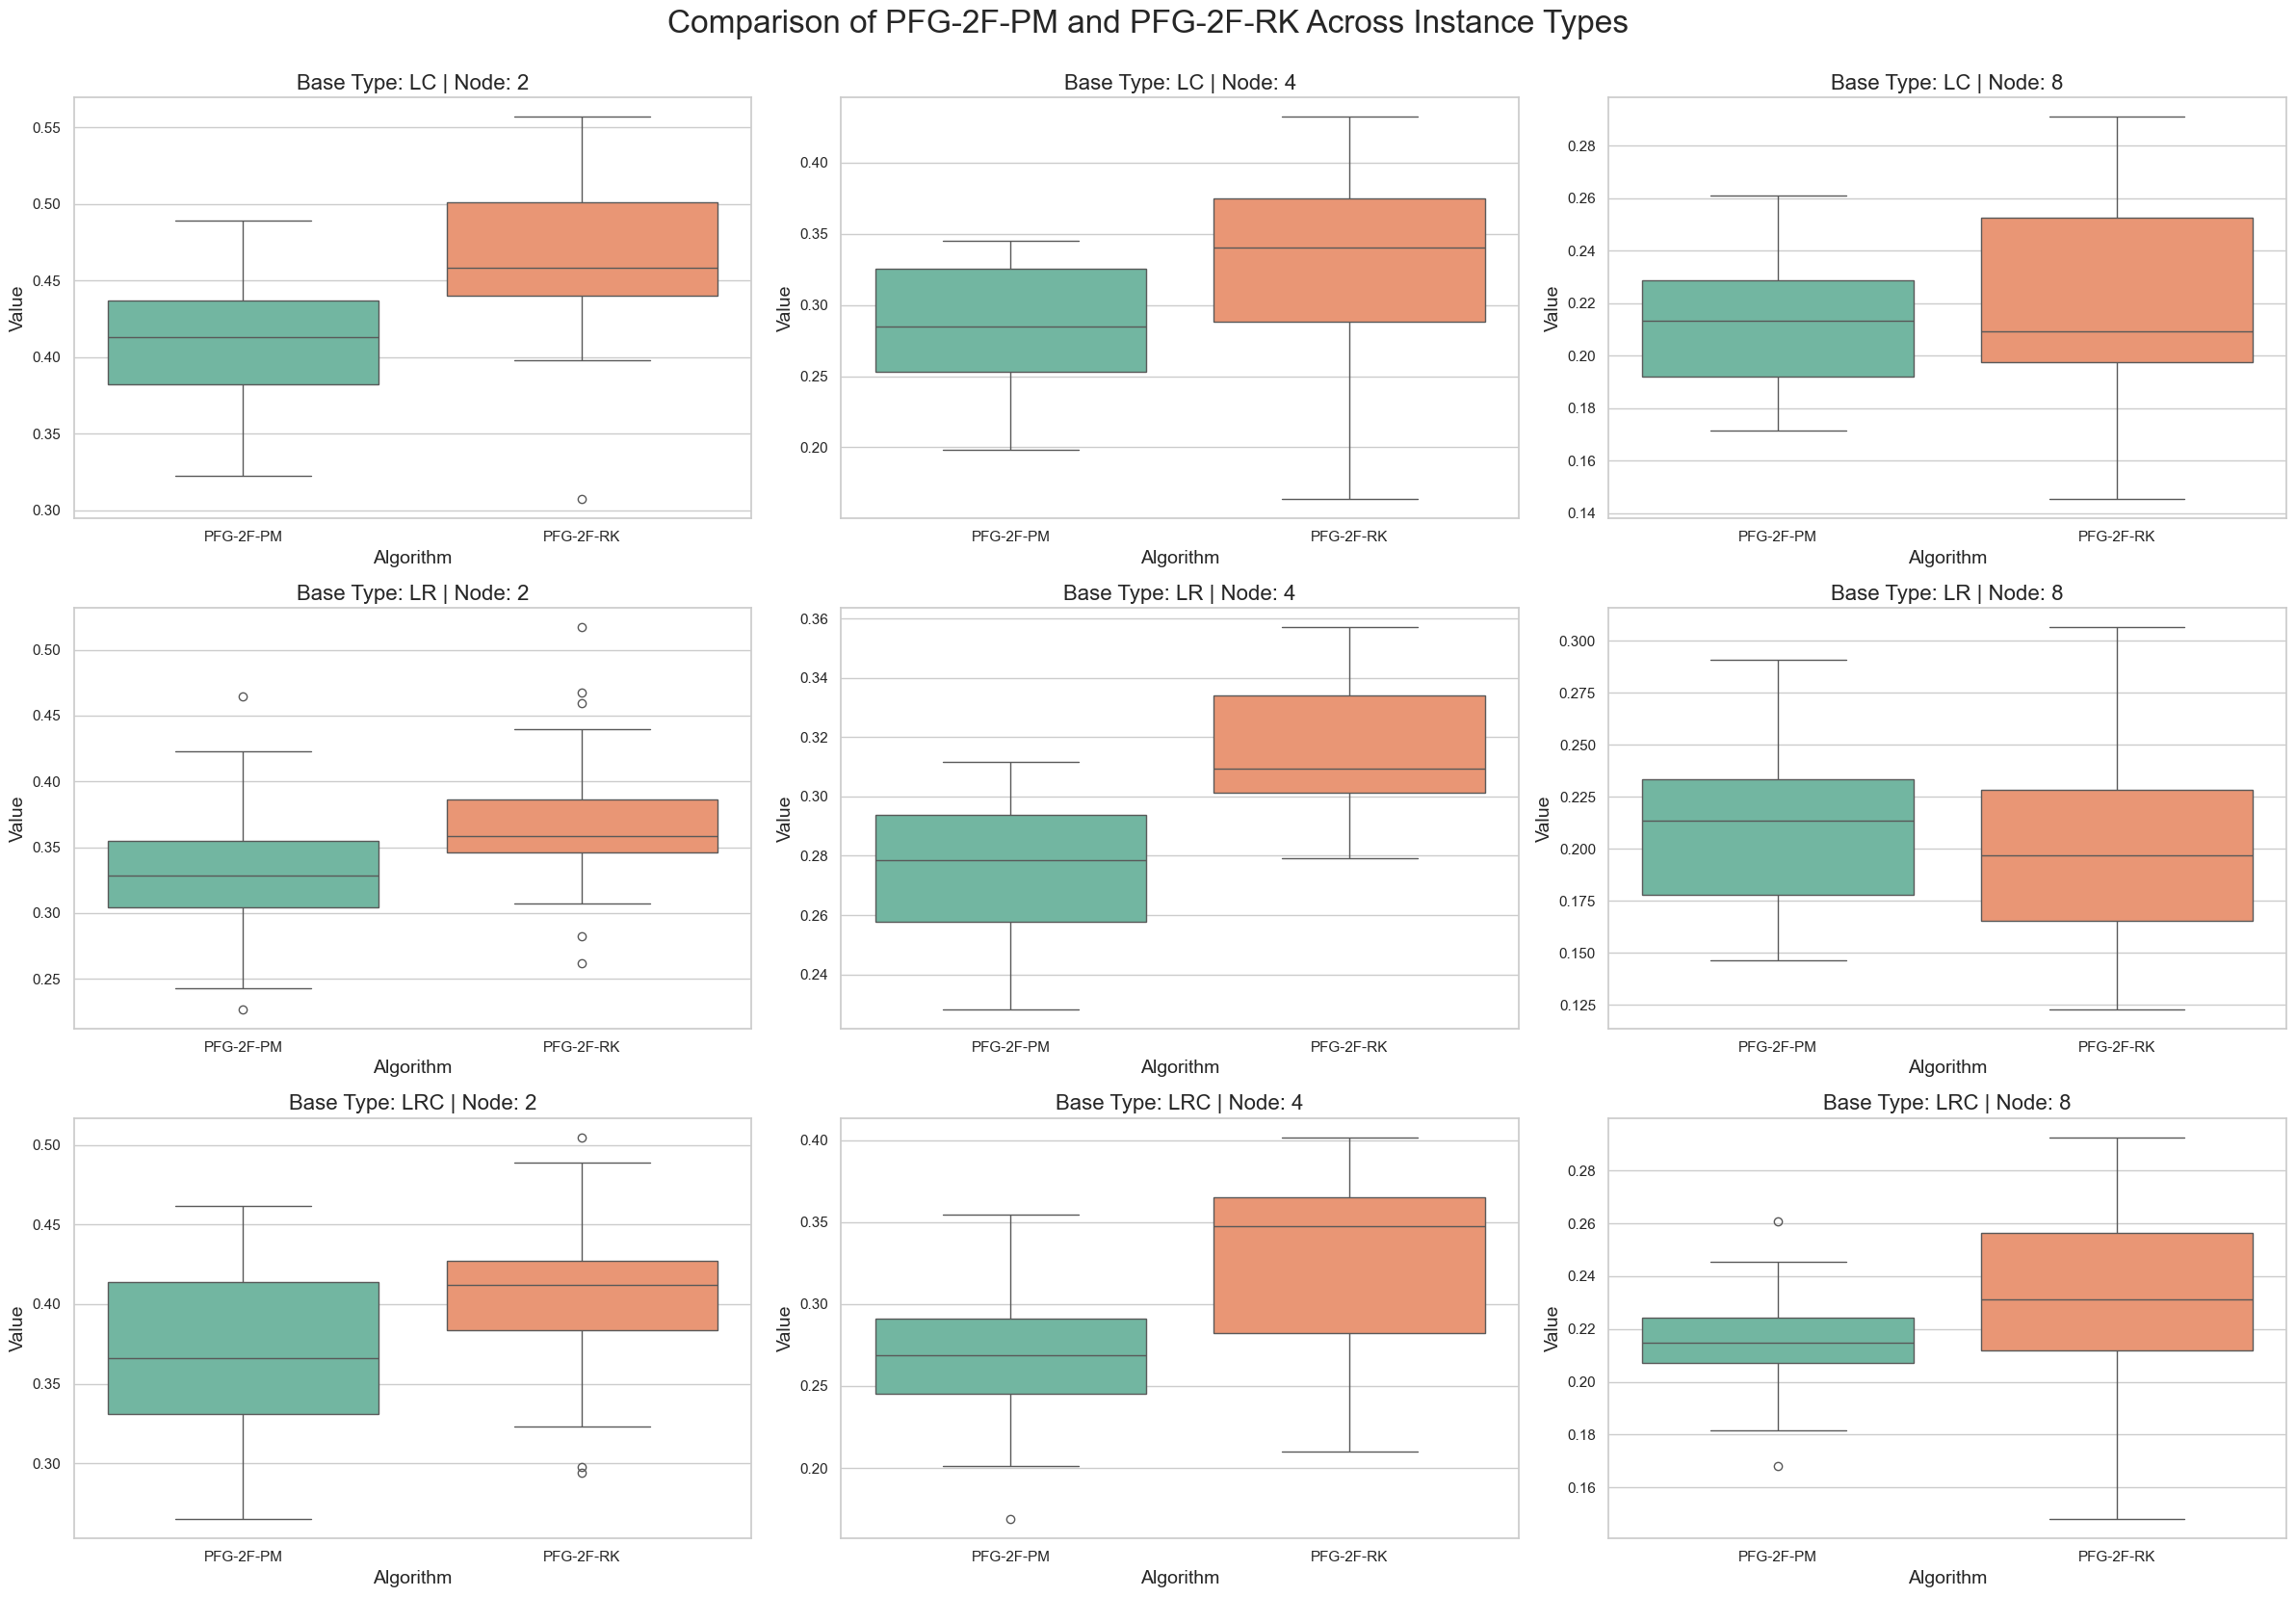

In [13]:
df_selected = df[['base_type', 'node', 'PFG-2F-PM', 'PFG-2F-RK']]

# Melt the DataFrame to have 'Algorithm' and 'Value' columns
df_melted = df_selected.melt(id_vars=['base_type', 'node'], 
                             value_vars=['PFG-2F-PM', 'PFG-2F-RK'], 
                             var_name='Algorithm', 
                             value_name='Value')

unique_base_types = df_melted['base_type'].unique()
unique_nodes = df_melted['node'].unique()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Define the number of rows and columns for subplots
n_rows = 3
n_cols = 3

# Initialize the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 18), sharey=False)

# Add a main title to the figure
fig.suptitle('Comparison of PFG-2F-PM and PFG-2F-RK Across Instance Types', fontsize=24, y=0.95)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create all possible combinations of base_type and node
from itertools import product

combinations = list(product(unique_base_types, unique_nodes))

# To fill 9 subplots, we'll add dummy combinations if necessary
all_combinations = list(product(unique_base_types, unique_nodes))
# If less than 9, add dummy combinations
while len(all_combinations) < n_rows * n_cols:
    all_combinations.append((None, None))  # Placeholder for empty plots

# Iterate through each subplot
for idx, (base_type, node) in enumerate(all_combinations):
    ax = axes[idx]
    
    if base_type is not None and node is not None:
        # Filter data for the current combination
        subset = df_melted[(df_melted['base_type'] == base_type) & (df_melted['node'] == node)]
        
        if not subset.empty:
            # Create the boxplot
            sns.boxplot(
                data=subset,
                x='Algorithm',
                y='Value',
                palette='Set2',
                ax=ax
            )
            
            # Set title and labels
            ax.set_title(f'Base Type: {base_type} | Node: {node}', fontsize=16)
            ax.set_xlabel('Algorithm', fontsize=14)
            ax.set_ylabel('Value', fontsize=14)
        else:
            # If no data for this combination
            ax.text(0.5, 0.5, 'No Data', horizontalalignment='center',
                    verticalalignment='center', fontsize=12, color='red')
            ax.set_title(f'Base Type: {base_type} | Node: {node}', fontsize=16)
            ax.set_xlabel('Algorithm', fontsize=14)
            ax.set_ylabel('Value', fontsize=14)
    else:
        # Empty subplot
        ax.axis('off')

# Adjust layout to make room for the main title and prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

In [1]:
import pandas as pd
import numpy as np
import re
df = pd.read_csv("F:\CodingEnvironment\DPDPTW2F\draw\hv_pivot_last.csv")

def extract_type_and_node(filename):
    # Use regex to extract type (LC, LR, LRC) and node
    type_match = re.match(r'^(LRC1|LRC2|LR1|LR2|LC1|LC2)', filename)
    node_match = re.search(r'_(\d+)_', filename)
    
    base_type = type_match.group(1) if type_match else None
    node = node_match.group(1) if node_match else None
    
    return base_type, node

# Apply the extraction function to create 'base_type' and 'node' columns

df[['base_type', 'node']] = df['file'].apply(lambda x: pd.Series(extract_type_and_node(x)))

print(df)

                file    MOEA/D   MOEA/D+   NSGA-II  PFG-MOEA  PFG-2F-RK  \
0    LC1_2_10_0.json  0.074650  0.071764  0.083412  0.230242   0.452793   
1     LC1_2_1_0.json  0.068078  0.051641  0.102562  0.152212   0.404344   
2     LC1_2_2_0.json  0.061085  0.077565  0.116086  0.169319   0.456885   
3     LC1_2_3_0.json  0.079584  0.099896  0.147143  0.239098   0.500509   
4     LC1_2_4_0.json  0.054056  0.059384  0.113614  0.202131   0.441798   
..               ...       ...       ...       ...       ...        ...   
175  LRC2_8_5_0.json  0.020422  0.023720  0.045777  0.092022   0.196315   
176  LRC2_8_6_0.json  0.011652  0.015497  0.037819  0.082907   0.152543   
177  LRC2_8_7_0.json  0.023550  0.022798  0.056311  0.093274   0.252623   
178  LRC2_8_8_0.json  0.018545  0.014228  0.037131  0.073475   0.217735   
179  LRC2_8_9_0.json  0.026736  0.017547  0.036770  0.079923   0.270692   

     PFG-2F-PM base_type node  
0     0.429883       LC1    2  
1     0.366098       LC1    2  
2  

C:\Users\Admin\AppData\Local\Temp\ipykernel_25816\3808833912.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(base_type_labels, rotation=0, fontsize=22, fontweight='bold')


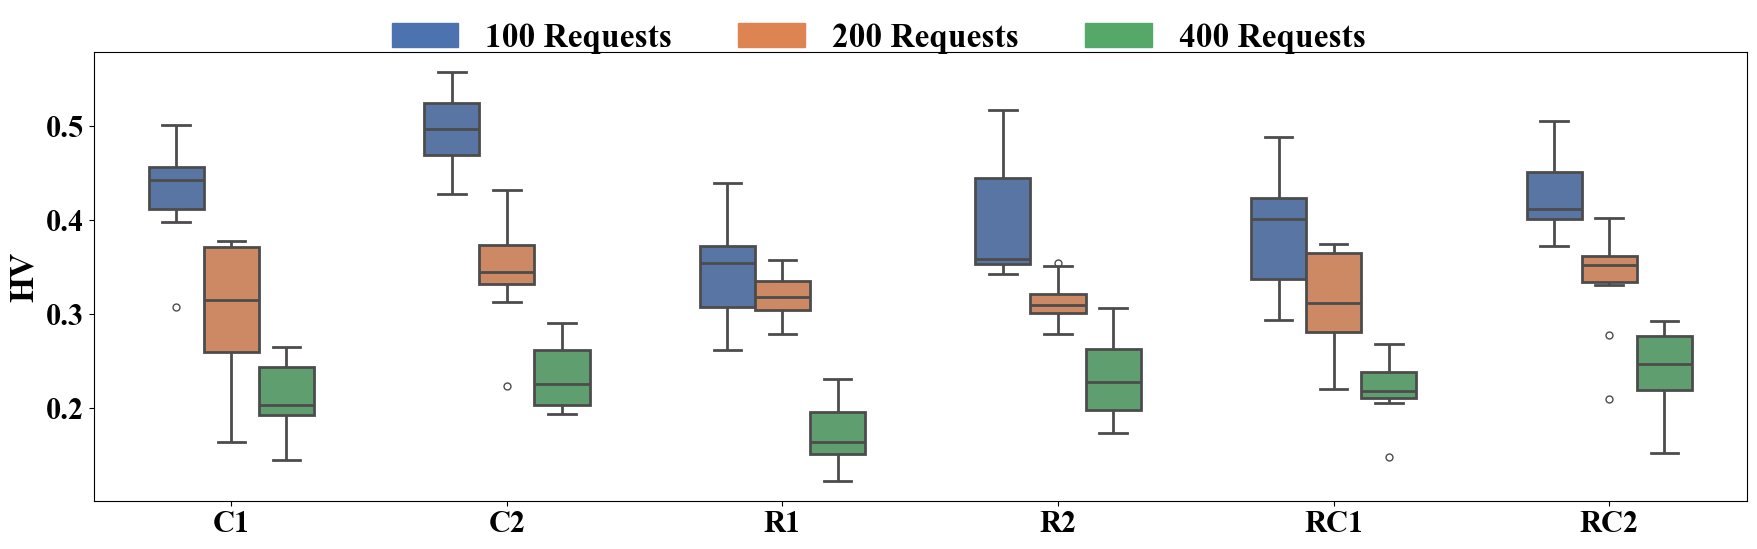

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Assuming 'df' is your DataFrame and is already defined
# Example:
# df = pd.read_csv('your_data.csv')

# Map 'base_type' to shorter labels
df['base_type_label'] = df['base_type'].map({
    'LC1': 'C1',
    'LC2': 'C2',
    'LR1': 'R1',
    'LR2': 'R2',
    'LRC1': 'RC1',
    'LRC2': 'RC2'
})

# Map 'node' to labels
df['node_label'] = df['node'].map({
    '2': '100',
    '4': '200',
    '8': '400'
})

# Define base type labels and nodes
base_type_labels = ['C1', 'C2', 'R1', 'R2', 'RC1', 'RC2']
nodes = ['100', '200', '400']

# Define colors for each node using Seaborn's default palette
palette = sns.color_palette("deep", len(nodes))  # Ensure enough distinct colors
node_colors = palette[:len(nodes)]  # Assign colors to nodes

# Create a color mapping for hue
hue_color_mapping = dict(zip(nodes, node_colors))

# Set the font family globally to Times New Roman and increase the font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 21
plt.rcParams['font.weight'] = 'bold'

# Create a figure with a custom GridSpec layout
fig = plt.figure(figsize=(18, 5.5))
gs = GridSpec(1, 1, figure=fig)

# Create the boxplot using Seaborn
ax = fig.add_subplot(gs[0])
sns.boxplot(
    data=df,
    x='base_type_label',      # Use base_type_label for x-axis
    y='PFG-2F-RK',
    hue='node_label',         # Use node_label for hue
    order=base_type_labels,   # Ensure x-axis categories are ordered as defined
    hue_order=nodes,          # Ensure '200' appears first in hue
    palette=hue_color_mapping,  # Apply color mapping based on nodes
    fliersize=5,
    linewidth=2,
    width=0.6
)

# Remove the default legend created by Seaborn
ax.legend_.remove()

# Remove grid for a cleaner look
ax.grid(False)

# Set X-axis labels with larger, bold, Times New Roman font and make them horizontal
ax.set_xticklabels(base_type_labels, rotation=0, fontsize=22, fontweight='bold')

# Set Y-axis label with larger, bold font
ax.set_ylabel('HV', fontsize=24, fontweight='bold')
ax.set_xlabel('', fontsize=24, fontweight='bold')  # Remove x-axis label if not needed

# Make Y-axis tick labels larger and bold
plt.setp(ax.get_yticklabels(), fontsize=22, fontweight='bold')

# Customize the legend
legend_handles = [
    mpatches.Patch(color=hue_color_mapping[node], label=f'{node} Requests') for node in nodes
]
legend = fig.legend(
    handles=legend_handles,
    fontsize=24,
    title='',
    title_fontsize=26,
    loc='upper center',
    ncol=len(nodes),
    frameon=False,
    bbox_to_anchor=(0.5, 1.05)
)

# Set legend text to bold and Times New Roman
for text in legend.get_texts():
    text.set_fontweight('bold')
    text.set_fontname('Times New Roman')
legend.get_title().set_fontweight('bold')
legend.get_title().set_fontname('Times New Roman')

# Adjust layout to accommodate the shared legend
plt.tight_layout(rect=[0, 0, 1, 1.0])

# Save the figure (optional)
plt.savefig("PFG_2F_RK_boxplot.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()